In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text  # adjustTextをインポート

In [3]:
# CSVファイルからデータを読み込む with 'utf-8' encoding
df = pd.read_csv(fr'C:\Users\100ca\Documents\PyCode\scraping\data\UT.csv', encoding='utf-8')

# '情報なし'や'---'などのデータをNaNに変換
df.replace({'情報なし': None, '---': None}, inplace=True)

# 数値データの列をfloat型に変換
numerical_cols = ['salary', 'overtime', 'salary_25_29', 'salary_30_34', 'salary_35_39', 'salary_40_44', 'salary_45_49', 'salary_50_54', 'salary_55_59', 'salary_60_up']

# Replace non-numeric values in these columns with NaN
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [4]:
# フォントの設定
plt.rcParams['font.family'] = 'Meiryo'  # 使用するフォント名を指定

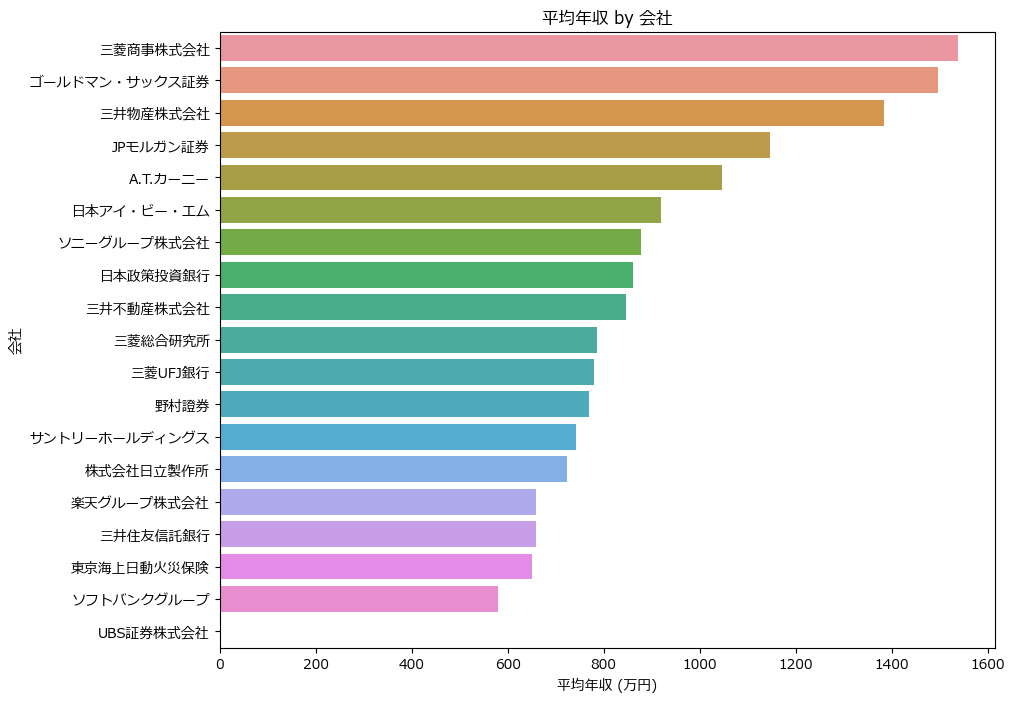

In [5]:
plt.figure(figsize=(10, 8))
sns.barplot(x='salary', y='company', data=df.sort_values('salary', ascending=False).head(100))
plt.title('平均年収 by 会社')
plt.xlabel('平均年収 (万円)')
plt.ylabel('会社')
plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


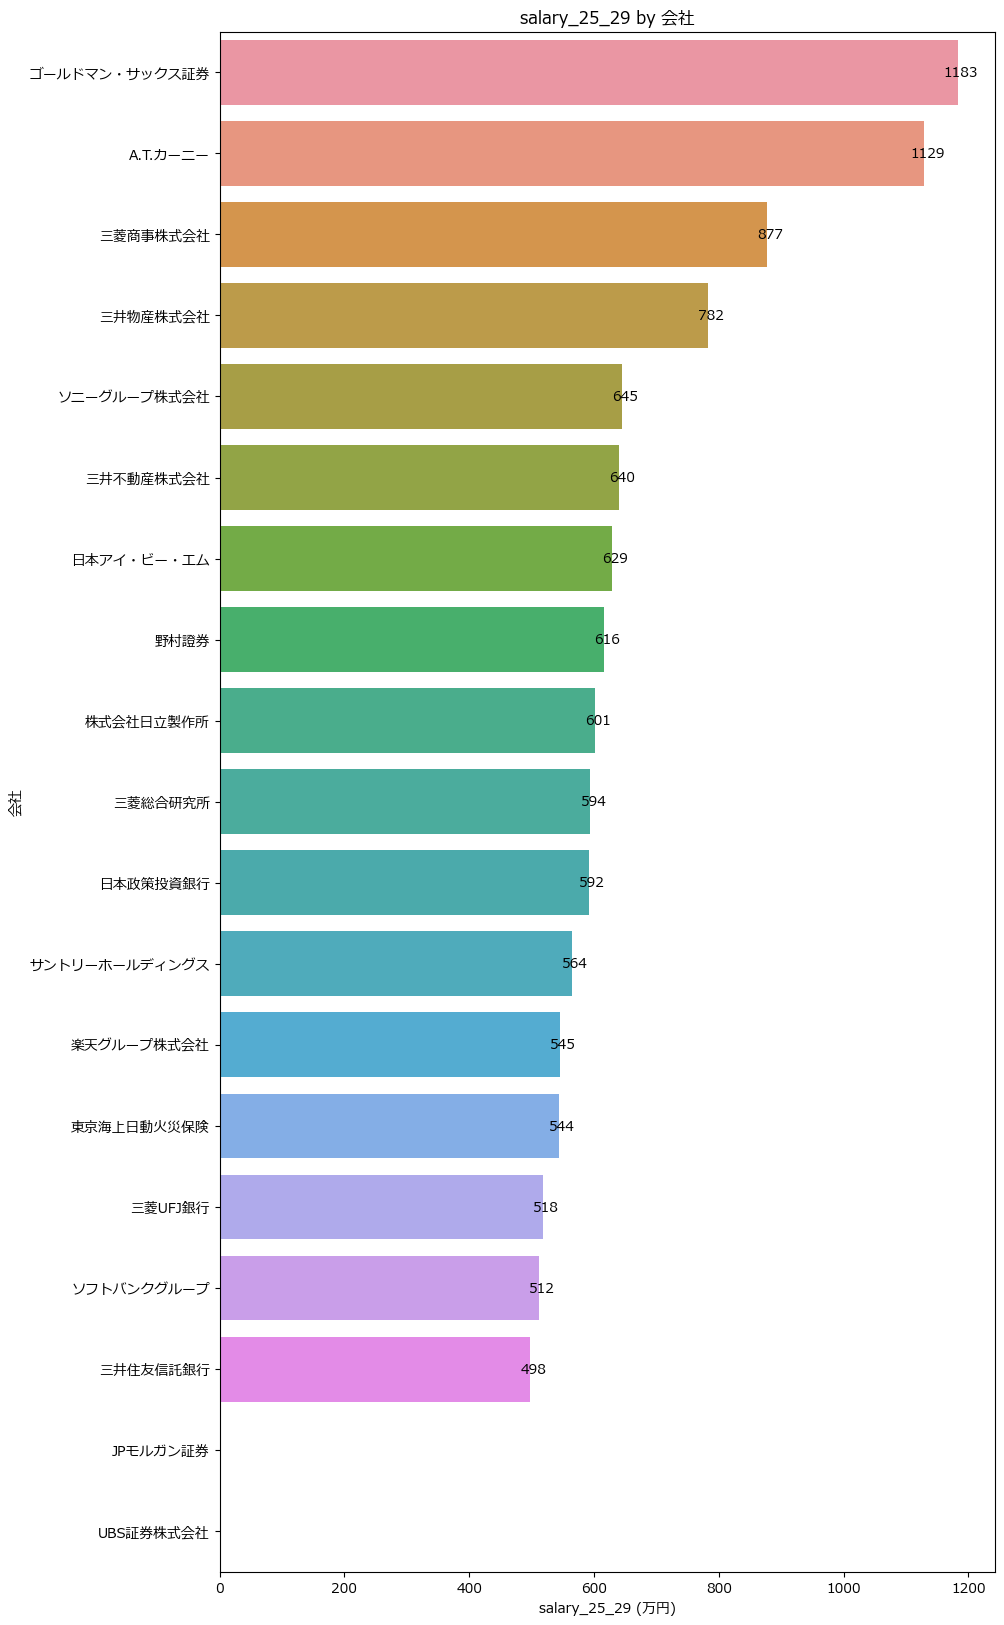

In [6]:
plt.figure(figsize=(10, 20))

# データを 'salary_25_29' 列でソートし、上位100件を取得
sorted_df = df.sort_values('salary_25_29', ascending=False).head(100)

# 水平棒グラフをプロット
barplot = sns.barplot(x='salary_25_29', y='company', data=sorted_df)

plt.title('salary_25_29 by 会社')
plt.xlabel('salary_25_29 (万円)')
plt.ylabel('会社')

# 各バーに値をアノテーションとして追加
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 5,  # アノテーションのx位置
             p.get_y() + p.get_height() / 2,  # アノテーションのy位置
             '{:1.0f}'.format(width),  # アノテーションのテキスト（バーの幅）
             ha='center', va='center')

plt.show()


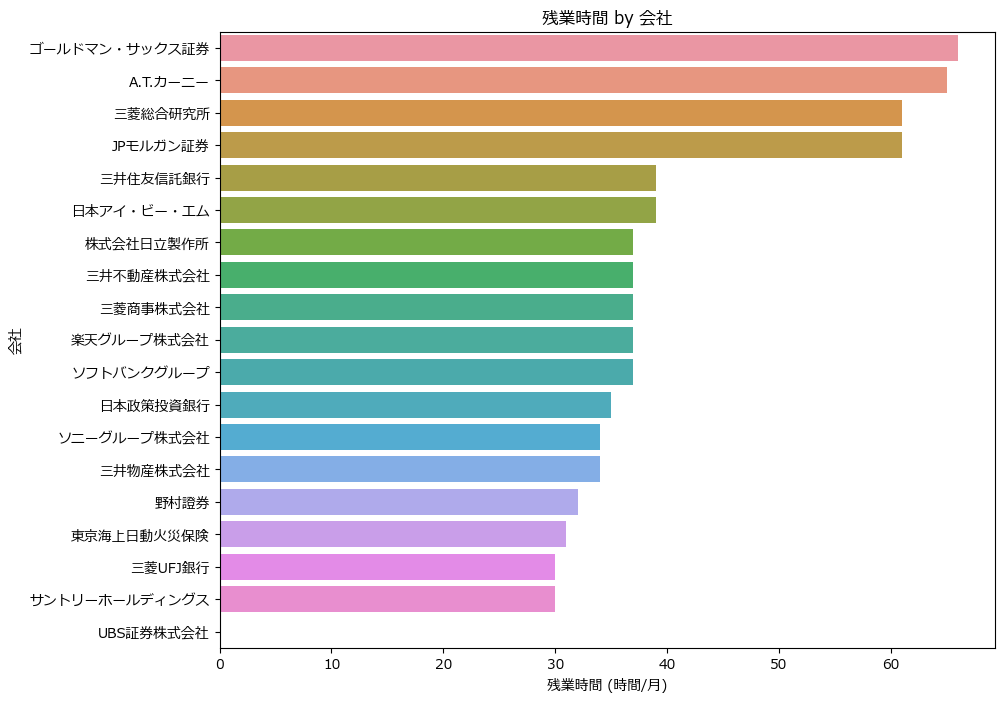

In [7]:
plt.figure(figsize=(10, 8))
sns.barplot(x='overtime', y='company', data=df.sort_values('overtime', ascending=False).head(100))
plt.title('残業時間 by 会社')
plt.xlabel('残業時間 (時間/月)')
plt.ylabel('会社')
plt.show()


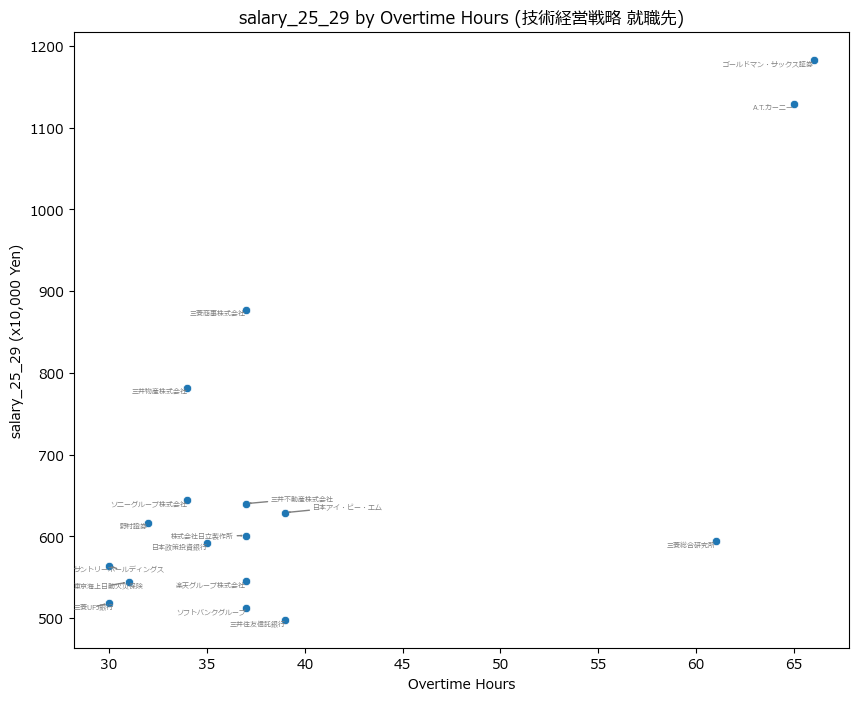

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text  # adjustTextをインポート

plt.figure(figsize=(10, 8))

# 残業時間と給与の関係を散布図で表示
scatter = sns.scatterplot(x='overtime', y='salary_25_29', data=df)

texts = []
for i in range(len(df)):
    # 有限値（finite value）であることを確認し、y軸の範囲内にあるデータのみをアノテーションする
    if pd.notnull(df.overtime.iloc[i]) and pd.notnull(df.salary_25_29.iloc[i]) :
        text = plt.text(x=df.overtime.iloc[i], y=df.salary_25_29.iloc[i], s=df.company.iloc[i], 
                        fontdict=dict(color='grey',size=5))
        texts.append(text)

plt.title('salary_25_29 by Overtime Hours (技術経営戦略 就職先)')
plt.xlabel('Overtime Hours')
plt.ylabel('salary_25_29 (x10,000 Yen)')
#plt.ylim([350, 750])  # y軸の範囲を350万円から750万円に設定

# テキストのオーバーラップを避ける
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey'))

plt.show()


c:\Users\100ca\miniconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


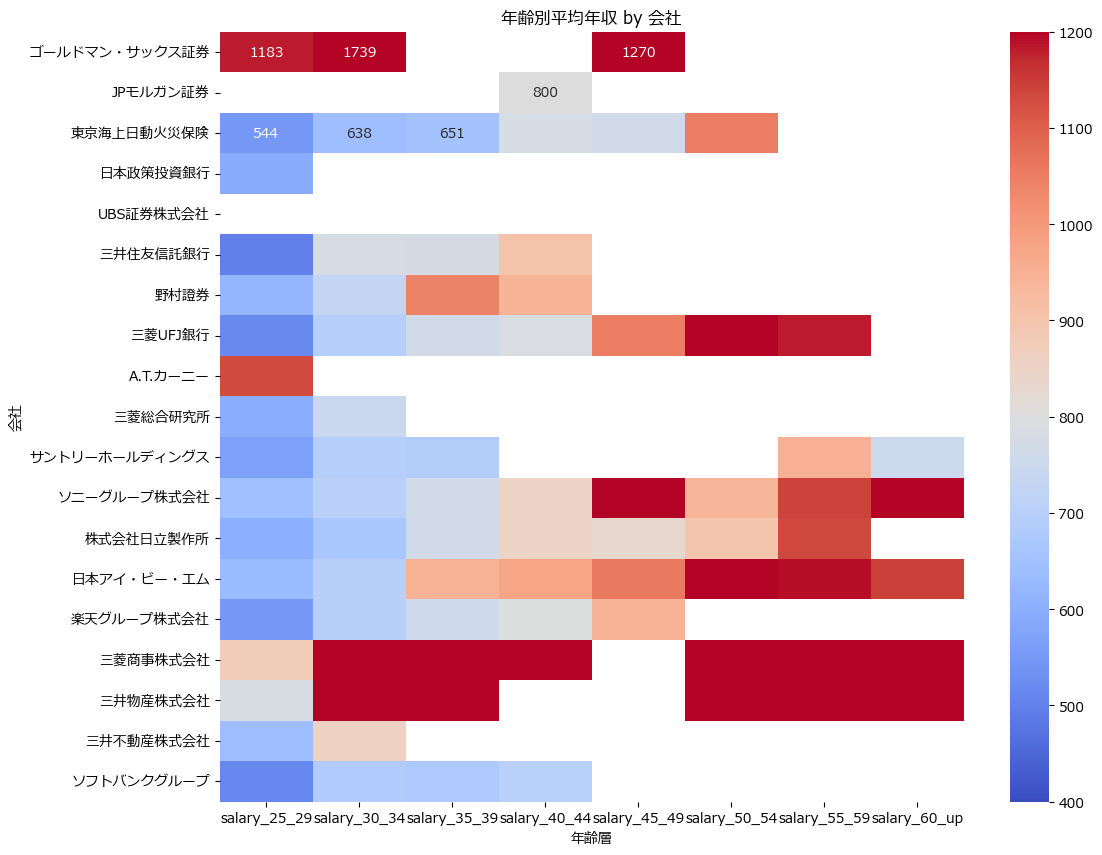

In [9]:
age_salary_df = df[['company', 'salary_25_29', 'salary_30_34', 'salary_35_39', 'salary_40_44', 'salary_45_49', 'salary_50_54', 'salary_55_59', 'salary_60_up']]

plt.figure(figsize=(12, 10))
sns.heatmap(age_salary_df.set_index('company'), annot=True, fmt=".0f", cmap='coolwarm', vmin=400, vmax=1200)
plt.title('年齢別平均年収 by 会社')
plt.xlabel('年齢層')
plt.ylabel('会社')
plt.show()


In [10]:
df.sort_values(by='salary_25_29',ascending=False).head(50)

,company,salary,overtime,salary_25_29,salary_30_34,salary_35_39,salary_40_44,salary_45_49,salary_50_54,salary_55_59,salary_60_up
0,ゴールドマン・サックス証券,1497.0,66.0,1183.0,1739.0,NaN,NaN,1270.0,NaN,NaN,NaN
8,A.T.カーニー,1047.0,65.0,1129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,三菱商事株式会社,1538.0,37.0,877.0,1281.0,1527.0,1508.0,NaN,2033.0,1739.0,2676.0
16,三井物産株式会社,1385.0,34.0,782.0,1229.0,1271.0,NaN,NaN,1512.0,1953.0,1763.0
11,ソニーグループ株式会社,877.0,34.0,645.0,704.0,764.0,853.0,1304.0,939.0,1141.0,1224.0
17,三井不動産株式会社,846.0,37.0,640.0,856.0,NaN,NaN,NaN,NaN,NaN,NaN
13,日本アイ・ビー・エム,919.0,39.0,629.0,699.0,946.0,976.0,1057.0,1220.0,1193.0,1144.0
6,野村證券,769.0,32.0,616.0,731.0,1042.0,942.0,NaN,NaN,NaN,NaN
12,株式会社日立製作所,723.0,37.0,601.0,665.0,763.0,851.0,831.0,898.0,1136.0,NaN
9,三菱総合研究所,786.0,61.0,594.0,746.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.describe()

,salary,overtime,salary_25_29,salary_30_34,salary_35_39,salary_40_44,salary_45_49,salary_50_54,salary_55_59,salary_60_up
count,18.000000,18.000000,17.000000,15.000000,12.000000,11.000000,7.000000,7.000000,7.000000,5.000000
mean,914.944444,41.222222,674.647059,856.000000,885.416667,900.000000,1031.714286,1272.285714,1327.714286,1511.400000
std,293.315825,12.473763,204.940217,312.968049,269.606939,216.658718,204.873713,395.683255,368.285086,744.464103
min,581.000000,30.000000,498.000000,638.000000,651.000000,700.000000,764.000000,898.000000,950.000000,750.000000
25%,728.000000,34.000000,545.000000,695.000000,741.500000,793.000000,887.000000,995.000000,1138.500000,1144.000000
50%,816.000000,37.000000,601.000000,704.000000,764.000000,851.000000,1053.000000,1220.000000,1182.000000,1224.000000
75%,1015.000000,39.000000,645.000000,818.500000,970.000000,923.500000,1163.500000,1382.500000,1466.000000,1763.000000
max,1538.000000,66.000000,1183.000000,1739.000000,1527.000000,1508.000000,1304.000000,2033.000000,1953.000000,2676.000000
